# Assignment 3: Classification with Logistic Regression

# Total: /100

## Instructions

* Complete the assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the assignment.

## The Dataset

The goal of our classifier is to predict, using a logistic regression, if a patient may take a certain drug.

The dataset contains both numerical and categorical input variables, while the response variable ('Drug') has multiple levels. To simplify our analysis here, we focus on predicting if a patient may take "Drug-Y".

In [ ]:
# You may need these
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
seed=0
%matplotlib inline

## Question 1: /18 pts

1. Read in the `drug.csv` dataset and display the first 5 rows.
2. Print out all columns in the dataset and list categorical variables. Use the build-in function `get_dummies()` to convert all categorical variables (**exclude Drug variable**) to dummy variables. You may read the official explanations for more information on `get_dummies()` [here](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html). What's the size of the dataframe after transforming it?
3. Map the target values from yes/no to 1/0. What is the baseline accuracy for this classification problem? Round into 1 decimal place (for example, 50.1% or 0.501).

1.1 Read the dataset and display the first 8 rows, and print out all columns in the dataset and **list** all categorical variables in the answer part.

In [ ]:
# Question 1.1 code here
df = pd.read_csv('drug.csv')
df.head(8)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,DrugY
2,47,M,LOW,HIGH,10.114,DrugY
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,NaN,LOW,HIGH,11.037,drugC


In [ ]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
df.dtypes
# 5 pts

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

**YOUR ANSWER HERE:** [1pt] *Categorical columns: "Sex", "BP","Cholesterol" and "Drug"*.

1.2 Check that is any there missing value in each column of the dataset.  

In [ ]:
# Question 1.2 code here
df.isnull().any()
# 2 pts

Age            False
Sex             True
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

1.3 Replace all the missing values in **Sex** to be 'M'.

In [ ]:
# Question 1.3 code here
df= df.fillna('M')
# 2 pts

1.4 Use the build-in function `get_dummies()` to convert all categorical variables (**excluding `Drug` variable**) to dummy variables. What's the size of the dataframe after transforming?

In [ ]:
# Question 1.4 code here
df = pd.get_dummies(df,columns=["Sex", "BP","Cholesterol"])

In [ ]:
df.shape
# 2 pts

(200, 10)

**YOUR ANSWER HERE:** [1pt] *The size is (200,10)*

1.5 Transform all the labels that is 'DrugY' in **`Drug`** to be value 1, otherwise, to be 0. Then transform the type of **`Drug`** to be 'int'.


In [ ]:
# Question 1.5 code here
df.loc[-df["Drug"].isin(['DrugY']),"Drug"]="0"
df.loc[df["Drug"].isin(['DrugY']),"Drug"]="1"

In [ ]:
df.Drug=df.Drug.astype('int')

In [ ]:
df.dtypes
# 2 pts

Age                     int64
Na_to_K               float64
Drug                    int64
Sex_F                   uint8
Sex_M                   uint8
BP_HIGH                 uint8
BP_LOW                  uint8
BP_NORMAL               uint8
Cholesterol_HIGH        uint8
Cholesterol_NORMAL      uint8
dtype: object

1.6. What is the baseline accuracy for this classification problem? Round into 1 decimal place (for example, 0.2).

In [ ]:
# Your code here
df.Drug.value_counts()

1    102
0     98
Name: Drug, dtype: int64

In [ ]:
round(102/(98+102),1)

0.5

In [ ]:
# or 
counts= df.Drug.value_counts()
baseline_accuracy = round(counts[1]/(counts[0]+counts[1]), 1)
baseline_accuracy
# 2 pts (keep 1 decimal in both the result of codes and answer part below)

0.5

**YOUR ANSWER HERE:** [1pt] *the baseline accuracy is 0.5 (or 50.0%)*

## Question 2: /7 pts

Split the data into train and test for the outcome/response and the predictor variables. Hold out 25% of observations as the test set.  Pass `random_state=11` to `train_test_split` to ensure you get the same train and tests sets as the solution. Your dependent variable in the the dataset is named as `Drug`. How many patients who take "DrugY" in the train dataset and test dataset, respectively?

In [ ]:
# Question 2 code here.

# Don't use the "Drug" as a feature
X = df.drop('Drug', axis='columns').values

y = df.Drug.values
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.25,random_state=11)
# 5 pts correct code

In [ ]:
sum(ytrain)

76

In [ ]:
sum(ytest)
# 1pt

26

**YOUR ANSWER HERE:** [1pt] *In the train dataset, there are 76 patients who take 'DrugY', and 26 in the test dataset.*

## Question 3: /20 pts

3.1 Create a instance of sklearn's `LogisticRegression` object for **unpenalized** logistic regression.
Using this object, **run a logisitic regression analysis** of `Drug` (y-variable) against `Age` and `Na_to_K` (x-variables) using your training data. Report the parameters (variables and intercept) of your model as indicated with the `print` function.

In [ ]:
# Question 3 code here
LOGREG_first_two = LogisticRegression(solver='lbfgs', penalty='none', max_iter=10000)
Xtrain_set1 = Xtrain[:,[0,1]]
Xtest_set1 = Xtest[:,[0,1]]
lr_first_two = LOGREG_first_two.fit(Xtrain_set1,ytrain)
lr_first_two.coef_
# 8 pts note they are required to use unpenalized regression

array([[-0.01090483,  0.65752731]])

In [ ]:
print(f'The parameters of the model asociated to age and Na_to_K are respectively: {lr_first_two.coef_[0]}')
# 1pt

The parameters of the model asociated to age and Na_to_K are respectively: [-0.01090483  0.65752731]


In [ ]:
print(f'The intercept of the model is {lr_first_two.intercept_[0]}')
# 1 pt

The intercept of the model is -8.720013063429404


3.2 Compute 4 label-based criteria, namely, 'Accuracy', 'Precision', 'Sensitivity' and 'Specificity' for your two variables only classifier **using the test data** (Round into 4 decimal place). Use a threshold of 0.5. Answer the questions in this text box below.

In [ ]:
## Put code here to compute criteria:
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = tp / (tp + fn) 
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    
    print("Accuracy:",round(acc,4),"Precision:",round(precision,4),
          "Sensitivity:",round(sensitivity,4),"Specificity:",round(specificity,4))
    #5 pts, calculating or reporting extra "Recall" will lose 1 pt. 

In [ ]:
## Put the code you need to answer the following questions.

ytest_hat = LOGREG_first_two.predict(Xtest_set1)
compute_performance(ytest_hat, ytest, LOGREG_first_two.classes_)

## Put code here to compute whatever else you might need to answer the question.

print(f"Value of amount for positive example: {sum(ytest_hat > 0)}")

# 2 pts

tp: 25 tn: 22 fp: 2 fn: 1
Accuracy: 0.94 Precision: 0.9259 Sensitivity: 0.9615 Specificity: 0.9167
Value of amount for positive example: 27


* How many of the test instances are labeled positive by your classifier?

**YOUR ANSWER HERE:**[1 pt] *27 cases are classified as positive.*

* Does this classifier reach the baseline accuracy?

**YOUR ANSWER HERE:** [1 pt] *Yes, the accuracy for the model is 94% vs. the baseline is 50%.*

* Is this classifier useful for classifying drug-Y? Explain in one or two sentences using the performance matrix results.

**YOUR ANSWER HERE:**[1 pt] *Since the classifier has significantly higher accuracy than the baseline accuracy, and the precision and sensitivity are high, this classifier is useful.*

## Question 4: /8 pts
Now with default penalty method, fit two logistic regression models using tuning parameter $C=0.1$ and $C=1$ to the training data and include all the variables in the data frame (except for `Drug`) in the cell below. You will want to make new objects like you did for the simpler model. Print the parameters (variables and intercept) you obtain, respectively.

In [ ]:
# Code for Question 4
LOGREG_1 = LogisticRegression(solver='lbfgs',penalty = 'l2', max_iter=10000,C=0.1)
lr_all_1 = LOGREG_1.fit(Xtrain,ytrain)
lr_all_1.coef_
#4 pts

array([[-0.0130806 ,  0.60277064, -0.11304191,  0.11306467, -0.24194974,
         0.36553947, -0.12356698,  0.23756636, -0.23754361]])

In [ ]:
lr_all_1.intercept_
#1pt

array([-7.95642709])

In [ ]:
LOGREG_2 = LogisticRegression(solver='lbfgs',penalty = 'l2', max_iter=10000,C=1)
lr_all_2 = LOGREG_2.fit(Xtrain,ytrain)
lr_all_2.coef_
#1pt

array([[-0.0251735 ,  0.77566215, -0.26073171,  0.26067561, -0.7210371 ,
         1.18493053, -0.46394953,  0.66529231, -0.66534841]])

In [ ]:
lr_all_2.intercept_
#1pt

array([-9.92561835])

* Describe the differences between the fitted model parameters obtained from the two models here.

**YOUR ANSWER:** [1 pt] *Larger tuning parameter $C$ yields larger absolute value of model parameters, which means that larger tuning parameter $C$ corresponds to smaller strength of penalization.* 

## Question 5: /15 pts

In the cell below, compute the 4 label-based criteria we mentioned in Question 3.2 for the two new classifiers using the test data. (You don't have to copy the function down into this cell; just call it again here.) Use a threshold of 0.5. 

In [ ]:
# Code for  Code for answering questions in the below cell
ytest_hat_all_1 = lr_all_1.predict(Xtest)
compute_performance(ytest_hat_all_1, ytest, lr_all_1.classes_)
# 5 pts

tp: 25 tn: 24 fp: 0 fn: 1
Accuracy: 0.98 Precision: 1.0 Sensitivity: 0.9615 Specificity: 1.0


In [ ]:
print(f"Value of amount for positive example: {sum(ytest_hat_all_1 > 0)}")
#1pt

Value of amount for positive example: 25


In [ ]:
ytest_hat_all_2 = lr_all_2.predict(Xtest)
compute_performance(ytest_hat_all_2, ytest, lr_all_2.classes_)
#2 pts

tp: 24 tn: 24 fp: 0 fn: 2
Accuracy: 0.96 Precision: 1.0 Sensitivity: 0.9231 Specificity: 1.0


In [ ]:
print(f"Value of amount for positive example: {sum(ytest_hat_all_2 > 0)}")
#1pt

Value of amount for positive example: 24


* How many of the test instances are respectively labeled positive by the two classifiers?

**YOUR ANSWER:** [3 pts] *25 and 24 are respectively labeled positive.* 

* Among the classifiers in Questions 3 and 4, which one is the **best classifier** for classifying Drug? Explain the possible reason in one or two sentences.

**YOUR ANSWER:** [3 pts] *The classifier in Question 4 with smaller tuning parameter $C$ performs best. This classifier contains more variables (i.e., more complex model), which helps to learn more. In addition, smaller tuning parameter $C$ gives stronger penalization which might help the classifier avoid overfitting problem.*

## Question 6: /14 pts
In the cell below, predict the class coding your own sigmoid function (do NOT use  the predict function from sklear). Compare the first 5 rows using the three models constructed in question 4 and question 5.

In [ ]:
# Your code here
sigmoid = lambda x: 1 / (1 + np.exp(-x))
# 3pts

In [ ]:
z1 = np.dot(Xtest[:,[0,1]],LOGREG_first_two.coef_.T) + LOGREG_first_two.intercept_
sigmoid(z1)[0:5]
# 3pts

array([[0.31345361],
       [0.99999017],
       [0.95907755],
       [0.04709426],
       [0.99998092]])

In [ ]:
z2 = np.dot(Xtest,lr_all_1.coef_.T) + lr_all_1.intercept_
sigmoid(z2)[0:5]
# 1pt

array([[0.23554322],
       [0.99994536],
       [0.94361639],
       [0.0558983 ],
       [0.99995873]])

In [ ]:
z3 = np.dot(Xtest,lr_all_2.coef_.T) + lr_all_2.intercept_
sigmoid(z3)[0:5]
# 1pt

array([[0.0991672 ],
       [0.99999003],
       [0.9788813 ],
       [0.02097274],
       [0.99999846]])

* Is the probability given by the sigmoid function the probability of a case being negative?

**YOUR ANSWER:**[3pts] *No, it is the probability of being labelled as positive.*

* By just looking over the first 5 cases, how does the probabilities obtained from the two classifiers in Question 4 changes? Does the change of probability actually change the classification results for the first 5 cases?

**YOUR ANSWER:**[3pts] *With larger $C$, those probabilities close to 1 further increase, whereas, those probabilities close to 0 further decrease. The changes does not really change the final results for the first 5 cases though.*

# Question 7: /7 pts

Plot ROC curves for all of your classifiers using the cells below, then answer the following questions, computing whatever quantities you need to answer them.

0.9775641025641025

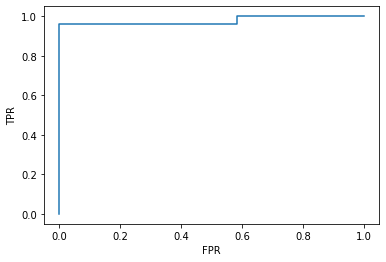

In [ ]:
# Your code here
# ROC for the first classifier
ytest_prob_amount = LOGREG_first_two.predict_proba(Xtest_set1)
fpr, tpr, _ = roc_curve(ytest, ytest_prob_amount[:,1], pos_label=1)
fig,ax=plt.subplots()
ax.plot(fpr,tpr)
ax.set(xlabel="FPR",ylabel="TPR")
auc(fpr,tpr)
#4 pts

0.9823717948717949

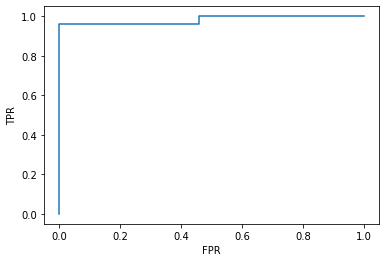

In [ ]:
# ROC for the second classifier
ytest_prob_1 = lr_all_1.predict_proba(Xtest)
fpr, tpr, _ = roc_curve(ytest, ytest_prob_1[:,1], pos_label=1)
fig,ax=plt.subplots()
ax.plot(fpr,tpr)
ax.set(xlabel="FPR",ylabel="TPR")
auc(fpr,tpr)
#1 pt

0.9903846153846154

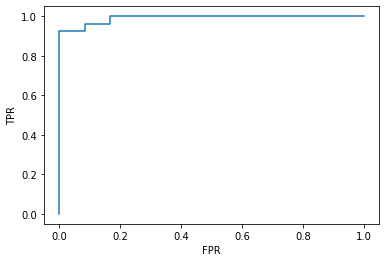

In [ ]:
# ROC for the third classifier
ytest_prob_2 = lr_all_2.predict_proba(Xtest)
fpr, tpr, _ = roc_curve(ytest, ytest_prob_2[:,1], pos_label=1)
fig,ax=plt.subplots()
ax.plot(fpr,tpr)
ax.set(xlabel="FPR",ylabel="TPR")
auc(fpr,tpr)
#1 pt

* Which classifier has a highest estimated probability of correctly distinguishing between a positive and a negative instance? How do you know?

**YOUR ANSWER:** [1 pts] *The AUROC gives the probability that a + is correctly distinguished from a -. Therefore the third model (contains all variables and $C=1$) has the best performance since its AUROC is 0.990 which is the largest.* 


# Question 8: /11 pts

Multiclass Logistic Regression

In the classification lab, we trained a binary LR classifier using the _mnist_ dataset to discriminate entries which were equal to 5 from the rest. This time you have 10 classes i.e., 0, 1, 2, 3, 4, 5, 6, 7, 8, and 9. Use the same dataset and `SGDClassifier` to tain a multiclass logistic regression model with `l2` regularization. For training, include these arguments too: `max_iter=2000`, `tol=1e-3`, `random_state=seed`. For computation speed-up, some `sklearn` functions take the argument `n_jobs=N` to run in parallel. A good value for N can be the number of physical CPU cores that your machine possesses. Check the documentations of the functions to take advantage from this where applicable. For splitting the data use `test_size=0.5` and `random_state=seed`.

Put your classifier and the `StandardScaler()` into a pipeline using `make_pipeline`. Therefore, your final model will be a pipeline that always standardizes the data before feeding it to the classifier. Use the `classification_report` to report the performance of your final model (*i.e.*, the pipeline) over the **test set**.



In [ ]:
# We will be using the MNIST dataset, which is a set of 70000 small images of handwritten digits.
# Each image is labeled with the digit it represents.
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

x_mnist = mnist["data"]
y_mnist = mnist["target"].astype(np.uint8)

X_train, X_test, y_train, y_test = train_test_split(x_mnist, y_mnist, test_size=0.5, random_state=seed)
# 2 pts

In [ ]:
# After reading the `SGDClassifier` documentation you realize the following argument settings:
# loss='hinge' gives linear support-vector machine
# loss='log` gives logistic regression which is what we want in this question.

clf4 = make_pipeline(StandardScaler(), SGDClassifier(loss='log', penalty="l2", max_iter=2000, tol=1e-3, n_jobs=4, random_state=seed)).fit(X_train, y_train)
# 5 pts

In [ ]:
print(classification_report(y_test, clf4.predict(X_test)))
# 2 pts

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      3535
           1       0.97      0.96      0.96      3954
           2       0.91      0.89      0.90      3475
           3       0.92      0.86      0.89      3546
           4       0.92      0.92      0.92      3386
           5       0.89      0.83      0.86      3158
           6       0.94      0.94      0.94      3389
           7       0.95      0.91      0.93      3652
           8       0.73      0.92      0.81      3392
           9       0.89      0.87      0.88      3513

    accuracy                           0.90     35000
   macro avg       0.91      0.90      0.90     35000
weighted avg       0.91      0.90      0.91     35000



Let's see how the model generalizes to new data.

You can run the cell below to see how well your model can recognize a digit written by the mouse cursor. Set the `final_model` variable according to the name choses for your pipeline, run the cell, draw on the pop-up canvas, and once you close the canvas you will see the result.

This code will not work on headless servers such as Colab. You need to install the `tk-tools` package and run it locally.

In [ ]:
final_model =   # here use the name of your pipeline

#!pip install tk-tools
from tkinter import *
import tkinter as tk
from PIL import Image
import io
import matplotlib as mpl

temp_file_name="TEMP_image_TEMP.jpg"

app = Tk()
app.geometry("300x300")

canvas = tk.Canvas(app, bg='white')
canvas.pack(anchor='nw', fill='both', expand=1)

def get_x_and_y(event):
    global lasx, lasy
    lasx, lasy = event.x, event.y

def draw_smth(event):
    global lasx, lasy
    canvas.create_line((lasx, lasy, event.x, event.y), fill='red', width=3.5)
    lasx, lasy = event.x, event.y
    ps = canvas.postscript(colormode = 'color')
    img = Image.open(io.BytesIO(ps.encode('utf-8')))
    img.save(temp_file_name)

canvas.bind("<Button-1>", get_x_and_y)
canvas.bind("<B1-Motion>", draw_smth)

app.mainloop()

img = Image.open(temp_file_name)
#resize image to 28x28 pixels
img = img.resize((28,28))
#convert rgb to grayscale
img = img.convert("L")
img = np.array(img)
img = 255.0 - img
print("Your input:")
plt.imshow(img, cmap = mpl.cm.binary); plt.axis("off")
plt.show()

# reshaping to support our model input
img = np.reshape(img, 28*28)
#predicting the class
print('Input recognized as ' + str(final_model.predict([img])[0])+'.')

* Despite showing great scores in training and testing stages, why your model does not generalize well to new data?

**YOUR ANSWER:** [2 pts]

Because new data is not comming from the same data generating process. There is differences between the traning data and new data. Things such as location of the digit on the canvas, resolution etc.